Maximize nearfield enhancement
======================
*01/2021: updated to pyGDM v1.1+*

In this example, we will search for a gold nano-structure geometry which leads to maximum electric field enhancement at some position (again of course for a specific wavelength and light polarization).


Load the modules
-------------------

In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields
from pyGDM2 import propagators
from pyGDM2 import core

from pyGDM2.EO.problems import ProblemNearfield
from pyGDM2.EO.models import RectangularAntenna
from pyGDM2.EO.core import run_eo

Setup and run the optimization
-------------------------------

Again, we setup first the pyGDM simulation and then the optimization model/problem/algorithm.
The model will be again the simple rectangular structure, the problem is now the maximization of the nearfield.

Finally we run the optimization.


/home/hans/.local/lib/python3.8/site-packages/pyGDM2/tools.py:817: UserWarning: Empty structure. Setting mesh to 'cubic'.
  warnings.warn("Empty structure. Setting mesh to 'cubic'.")
/home/hans/.local/lib/python3.8/site-packages/pyGDM2/structures.py:183: UserWarning: Emtpy structure geometry.
  warnings.warn("Emtpy structure geometry.")
/home/hans/.local/lib/python3.8/site-packages/pyGDM2/tools.py:835: UserWarning: Mesh not detected, falling back to 'cubic'.
  warnings.warn("Mesh not detected, falling back to 'cubic'.")
/home/hans/.local/lib/python3.8/site-packages/numba/core/dispatcher.py:237: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  entrypoints.init_all()


structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 0/0 dipoles valid
Rectangular Antenna optimziation model: Note that this simple model is rather intended for testing and demonstration purposes.

----------------------------------------------
 Starting new optimization
----------------------------------------------




/home/hans/.local/lib/python3.8/site-packages/pyGDM2/tools.py:835: UserWarning: Mesh not detected, falling back to 'cubic'.
  warnings.warn("Mesh not detected, falling back to 'cubic'.")


iter #  1, time:   22.9s, progress #  1, f_evals: 80


/home/hans/.local/lib/python3.8/site-packages/pyGDM2/EO/models.py:155: UserWarning: 'models.BaseModel.plot_structure' not re-implemented! Using `pyGDM2.visu.structure`.
  warnings.warn("'models.BaseModel.plot_structure' not re-implemented! Using `pyGDM2.visu.structure`.")
/home/hans/.local/lib/python3.8/site-packages/pyGDM2/visu.py:49: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


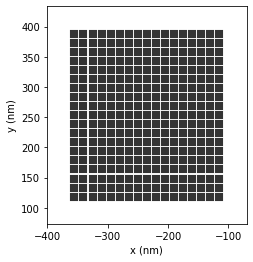

/home/hans/.local/lib/python3.8/site-packages/pyGDM2/tools.py:835: UserWarning: Mesh not detected, falling back to 'cubic'.
  warnings.warn("Mesh not detected, falling back to 'cubic'.")


        - champion fitness: [-2.4842]

iter #  2, time:   41.0s, progress #  2, f_evals: 120
        - champion fitness: [-7.8537]

iter #  3, time:   65.5s, progress #  2, f_evals: 160(non-success: 1)
iter #  4, time:   86.2s, progress #  2, f_evals: 200(non-success: 2)
iter #  5, time:  110.8s, progress #  3, f_evals: 240
        - champion fitness: [-8.896]

iter #  6, time:  135.5s, progress #  3, f_evals: 280(non-success: 1)
iter #  7, time:  156.6s, progress #  3, f_evals: 320(non-success: 2)
iter #  8, time:  175.9s, progress #  3, f_evals: 360(non-success: 3)
iter #  9, time:  207.5s, progress #  3, f_evals: 400(non-success: 4)
iter # 10, time:  237.4s, progress #  3, f_evals: 440(non-success: 5)
iter # 11, time:  264.9s, progress #  4, f_evals: 480
        - champion fitness: [-13.634]

iter # 12, time:  282.6s, progress #  5, f_evals: 520


/home/hans/.local/lib/python3.8/site-packages/pyGDM2/EO/models.py:155: UserWarning: 'models.BaseModel.plot_structure' not re-implemented! Using `pyGDM2.visu.structure`.
  warnings.warn("'models.BaseModel.plot_structure' not re-implemented! Using `pyGDM2.visu.structure`.")


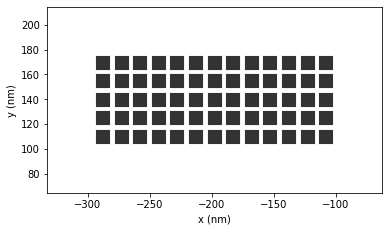

        - champion fitness: [-13.841]

iter # 13, time:  312.3s, progress #  5, f_evals: 560(non-success: 1)
iter # 14, time:  329.3s, progress #  5, f_evals: 600(non-success: 2)
iter # 15, time:  345.5s, progress #  5, f_evals: 640(non-success: 3)
iter # 16, time:  369.6s, progress #  6, f_evals: 680
        - champion fitness: [-14.2]

iter # 17, time:  387.0s, progress #  6, f_evals: 720(non-success: 1)
iter # 18, time:  407.9s, progress #  6, f_evals: 760(non-success: 2)

 -------- timelimit reached


In [2]:
#==============================================================================
# Setup pyGDM simulation
#==============================================================================
## ---------- Setup structure
mesh = 'cube'
step = 15
material = materials.gold()        # material: gold
## --- Empty dummy-geometry, will be replaced on run-time by EO trial geometries
geometry = []       
struct = structures.struct(step, geometry, material)


## ---------- Setup incident field
field_generator = fields.plane_wave       # planwave excitation
kwargs = dict(theta = [0.0])              # target polarization
wavelengths = [800]                       # target wavelength
efield = fields.efield(field_generator, wavelengths=wavelengths, kwargs=kwargs)


## ---------- environment
dyads = propagators.DyadsQuasistatic123(n1=1, n2=1)


## ---------- Simulation initialization
sim = core.simulation(struct, efield, dyads)


#==============================================================================
# setup evolutionary optimization
#==============================================================================
## --- structure model and optimizaiton problem
limits_W   = [2, 20]
limits_L   = [2, 20] 
limits_pos = [-500, 500]
height = 3
model = RectangularAntenna(sim, limits_W, limits_L, limits_pos, height)

target = 'E'
r_probe = [-100, 150, 80]
problem = ProblemNearfield(model, r_probe=r_probe, opt_target=target)



## --- filename to save results 
results_filename = 'eo_NF.eo'

## --- size of population
population = 40          # Nr of individuals

## --- stop criteria
max_time = 400           # seconds
max_iter = 30            # max. iterations
max_nonsuccess = 10      # max. consecutive iterations without improvement

## --- other config
generations = 1          # generations to evolve between status reports
plot_interval = 5        # plot each N improvements
save_all_generations = False

##  Use algorithm "sade" (jDE variant, a self-adaptive form of differential evolution)
import pygmo as pg
algorithm = pg.sade
algorithm_kwargs = dict()   # optional kwargs passed to the algorithm


eo_dict = run_eo(problem,
                 population=population,
                 algorithm=algorithm,
                 plot_interval=plot_interval, 
                 generations=generations, 
                 max_time=max_time, max_iter=max_iter, max_nonsuccess=max_nonsuccess,
                 filename=results_filename)

**Note:** Since we have 4 free parameters (the scattering example had only 2), the convergence is visibly slower in this problem compared to the example maximizing the scattering.

Load and analyze best solution
-----------------------------------

Let's calculate a nearfield map of the scattered field of the optimum structure

In [3]:
## --- load additional modules
from pyGDM2 import linear
from pyGDM2 import tools
from pyGDM2 import visu

from pyGDM2.EO.tools import get_best_candidate
from pyGDM2.EO.tools import get_best_candidate_f_x
from pyGDM2.EO.tools import get_problem

import matplotlib.pyplot as plt


#==============================================================================
# Load best candidate from optimization
#==============================================================================
## --- optimization results file
results_filename = 'eo_NF.eo'

sim = get_best_candidate(results_filename, iteration=-1, verbose=True)
problem = get_problem(results_filename)
f, x, N_improvements = get_best_candidate_f_x(results_filename, iteration=-1)


print('\n ==================================================')
print("                    Problem:", problem.get_extra_info())
print(" target position: {}".format(problem.r_probe.T[0]))
print(" optimization: Nr of improvements {}".format(N_improvements))
print(" optimization: best fitness {}".format(f))
print('===================================================\n')

Best candidate after 17 iterations (with 5 improvements): fitness = ['-14.2']
Testing: recalculating fitness...Done. Everything OK.

                    Problem: 
	Maximization of near-field intensity
 target position: [-100  150   80]
 optimization: Nr of improvements 6
 optimization: best fitness [-14.20010433]



**Note:** We don't even have to setup a new simulation in this case, since we keep all parameters as during in the optimization (remember, when we were analyzing the optimum solution in the scattering example we calculated a whole spectrum which we don't need to do now). 
In this example, we will simply use the `simulation` object, returned by `get_best_candidate`. Since we didn't turn off the fitness-verification, `core.scatter` was already executed within `get_best_candidate`, so all we need to do is to use `linear.nearfield` to get the nearfield distribution on a 2D map outside the structure.

Nearfield map above optimum solution
-----------------------------------------

In [4]:
## --- map 80nm above substrate
MAP = tools.generate_NF_map_XY(-300,300,51, -300,300,51, Z0=80)
Es, Etot, Bs, Btot = linear.nearfield(sim, field_index=0, r_probe=MAP)

Finally, we plot the result (including the structure contour and target position of NF maximization):

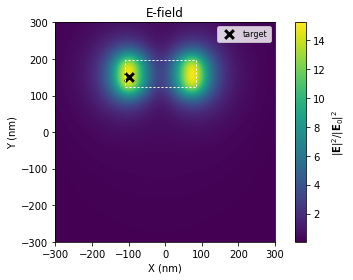

In [5]:
plt.figure()
plt.subplot(aspect='equal')
plt.title("E-field")

im = visu.structure_contour(sim, color='w', dashes=[2,2], show=0, zorder=10)
im = visu.vectorfield_color(Es, show=0, interpolation='bicubic')
plt.colorbar(im, label=r'$|\mathbf{E}|^2/|\mathbf{E}_0|^2$')

plt.scatter(problem.r_probe[0], problem.r_probe[1], marker='x', lw=3, s=75, color='k', label='target')
plt.legend(loc='best', fontsize=8)

plt.xlabel("X (nm)")
plt.ylabel("Y (nm)")
plt.clim( [0, im.get_clim()[1]] )


plt.tight_layout()
plt.show()

The optimization result has a nearfield hot-spot at the target position *(X,Y,Z)* = *(-100, 150, 80)*. 

This is a pretty encouraging result: Not only did the algorithm find a nano-rod resonant at the target wavelength, also it shifted the structure to the optimum location such that the spot of maximum field enhancement coincides with the target position.